# HW1

In [37]:
# Common imports
import numpy as np
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Part I

In [38]:
housing = pd.read_csv("home_data.csv")
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 1. Selection and summary statistics:

Which neighborhood (zip code) of Seattle has the highest average house sale price? Now, take the sales data, select only the houses with this zip code, and compute the average price.

In [46]:
top_ave_zip = housing.groupby(by="zipcode")["price"].mean().nlargest(1)
print(f"The highest average house sale price of zipcode is: {top_ave_zip.index[0]}")
print(f"The average price in {top_ave_zip.index[0]} is: {top_ave_zip.values[0]}")

The highest average house sale price of zipcode is: 98039
The average price in 98039 is: 2160606.6


## 2. Filtering data:

One of the key features is the number of square feet of living space (‘sqft_living’) in the house. Select the houses that have ‘sqft_living’ higher than 2000 sqft but no larger than 4000 sqft. What fraction of the all houses have ‘sqft_living’ in this range?

In [52]:
ratio = len(housing[(housing.sqft_living > 2000) & (housing.sqft_living < 4000)])/len(housing)
print(f"The fraction of the all house have 'sqft_living' in this range is: {ratio:.3f}")

The fraction of the all house have 'sqft_living' in this range is: 0.422


## 3. Visualization:

Plot the relationship between ‘house sale price’ and ‘sqft_living’.

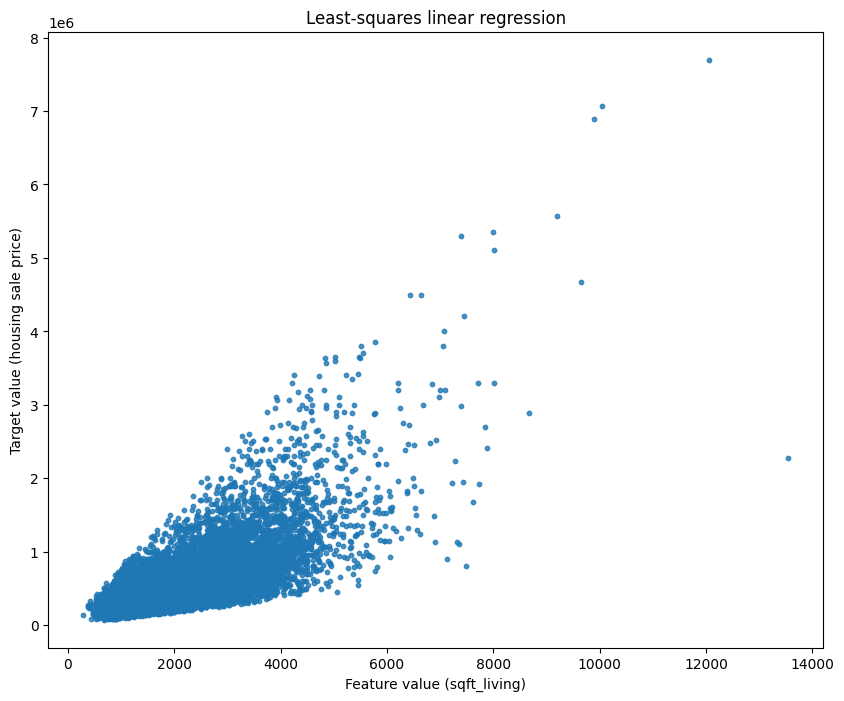

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
X = housing.sqft_living
y = housing.price

plt.figure(figsize=(10,8))
plt.scatter(X, y, marker = 'o', s=10, alpha=0.8)
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (sqft_living)')
plt.ylabel('Target value (housing sale price)')
plt.show()

## 4. Building regression models with different features (all models must be fit on the original sales dataset, not the one filtered on `sqft_living`. Do NOT split the data into training and test sets):

In [6]:
from sklearn.linear_model import LinearRegression
X = housing[["sqft_living"]]
y = housing.price

LinReg = LinearRegression().fit(X,y)
print('linear model coeff (w): {}'
     .format(LinReg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(LinReg.intercept_))
print('R-squared score: {:.3f}'
     .format(LinReg.score(X, y)))


linear model coeff (w): [280.62356663]
linear model intercept (b): -43580.740
R-squared score: 0.493


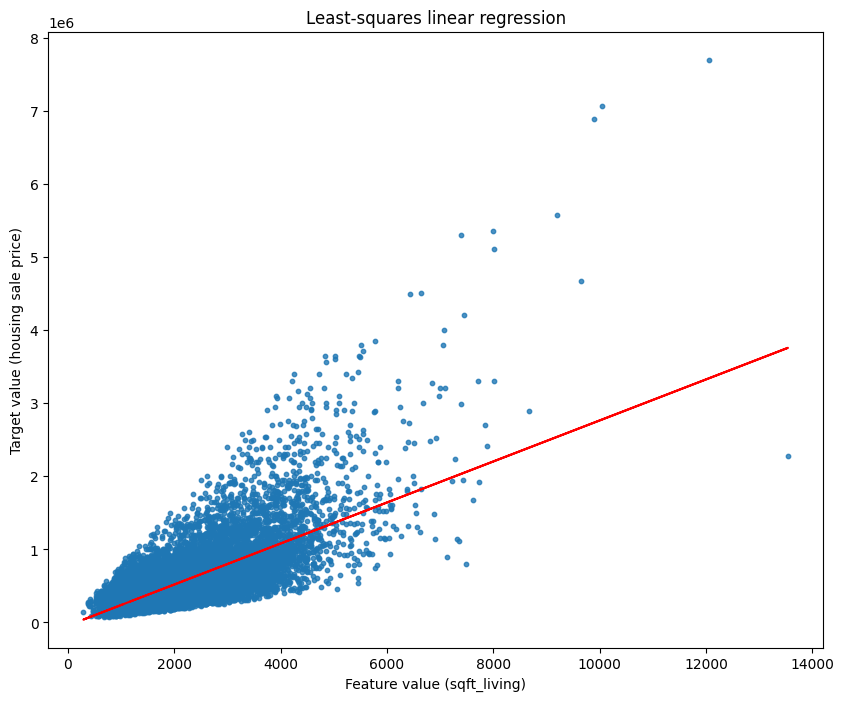

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(X, y, marker = 'o', s=10, alpha=0.8)
plt.plot(X, LinReg.predict(X), "r-")
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (sqft_living)')
plt.ylabel('Target value (housing sale price)')
plt.show()

Using this simple regression model, what is the predicted price for a house with 2650 sqft?

In [62]:
X_new = [[2650]]

y_new = LinReg.predict(X_new)
print(f"The predicted price for a house with 2650 sqft is: {y_new[0]:.2f}")

The predicted price for a house with 2650 sqft is: 700071.71


c:\Users\anson\Documents\GitHub\SCU_MSIS2508\.env\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Using this simple regression model, what is the estimated square-feet for a house costing $800,000?

In [61]:
coef = LinReg.coef_
int = LinReg.intercept_

y_new = 800000
pred_X = (y_new - int)/coef

print(f"The estimated square-feet for a house costing $800,000 is: {pred_X[0]:.2f}")

array([3006.09371639])

The estimated square-feet for a house costing $800,000 is: 3006.09


Using this simple regression model, what is the predicted price for a house with 3 bedrooms?

In [10]:
from sklearn.linear_model import LinearRegression
X2 = housing[["bedrooms"]]
y = housing.price

LinReg2 = LinearRegression().fit(X2,y)
print('linear model coeff (w): {}'
     .format(LinReg2.coef_))
print('linear model intercept (b): {:.3f}'
     .format(LinReg2.intercept_))
print('R-squared score: {:.3f}'
     .format(LinReg2.score(X2, y)))

linear model coeff (w): [121716.12623836]
linear model intercept (b): 129802.357
R-squared score: 0.095


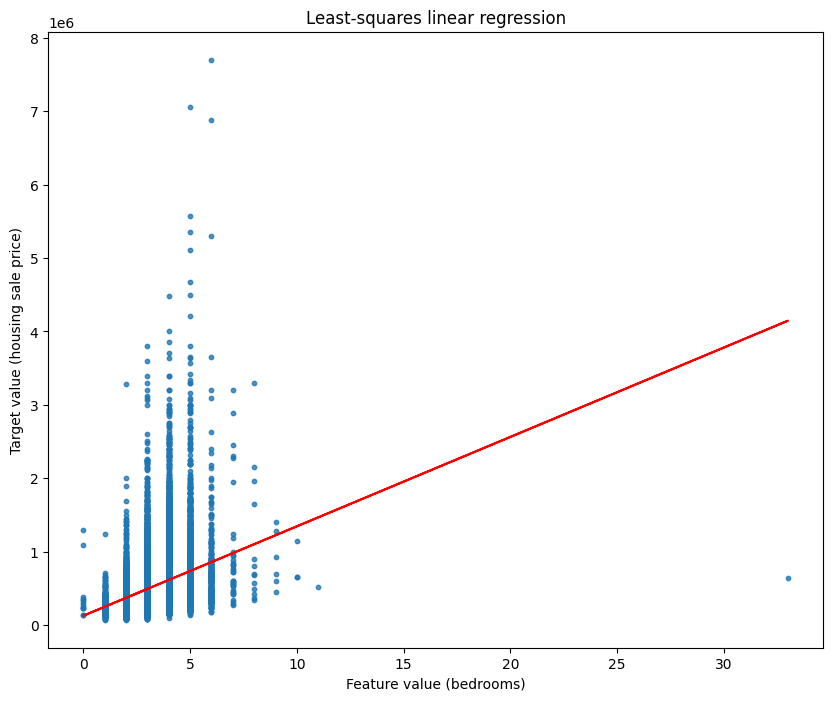

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(X2, y, marker = 'o', s=10, alpha=0.8)
plt.plot(X2, LinReg2.predict(X2), "r-")
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (bedrooms)')
plt.ylabel('Target value (housing sale price)')
plt.show()

In [63]:
X_new2 = [[3]]

y_new2 = LinReg2.predict(X_new2)

print(f"The predicted price for a house with 3 bedrooms is: {y_new2[0]:.2f}")

The predicted price for a house with 3 bedrooms is: 494950.74


c:\Users\anson\Documents\GitHub\SCU_MSIS2508\.env\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Compute and compare the RMSE (root mean squared error) of the two models.

Model 1 with sqft_living

In [66]:
from sklearn.metrics import mean_squared_error

housing_pred = LinReg.predict(X)
lin_mse = mean_squared_error(y, housing_pred)
lin_rmse = np.sqrt(lin_mse)
print(f"The RMSE for Model 1 is: {lin_rmse:.2f}")

The RMSE for Model 1 is: 261440.79


Model 2 with bedrooms

In [67]:
from sklearn.metrics import mean_squared_error

housing_pred2 = LinReg2.predict(X2)
lin_mse2 = mean_squared_error(y, housing_pred2)
lin_rmse2 = np.sqrt(lin_mse2)
print(f"The RMSE for Model 2 is: {lin_rmse2:.2f}")

The RMSE for Model 2 is: 349230.15


# Part II

## 1. Load the breast cancer dataset. Import the functions `load_breast_cancer` from `sklearn.datasets`.

In [15]:
from sklearn.datasets import load_breast_cancer
b_cancer = load_breast_cancer()

In [16]:
b_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

## 2. Provide an explanation of the data set.

In [17]:
print("Keys of breast_cancer_dataset:\n", b_cancer.keys())

Keys of breast_cancer_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [18]:
print("Data Description:", b_cancer['DESCR'])

Data Description: .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, fi

In [19]:
print("Target names:", b_cancer['target_names'])

Target names: ['malignant' 'benign']


## 3. What are the features in the data set?

In [20]:
print("Feature name:\n", b_cancer['feature_names'])

Feature name:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [21]:
print("Type of data:", type(b_cancer['data']))

Type of data: <class 'numpy.ndarray'>


In [22]:
print("Shape of data:", b_cancer['data'].shape)

Shape of data: (569, 30)


In [23]:
print("First five rows of data:\n", b_cancer['data'][:5])

First five rows of data:
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02

## 4. Create some basic visualization of the data set.

<Axes: ylabel='count'>

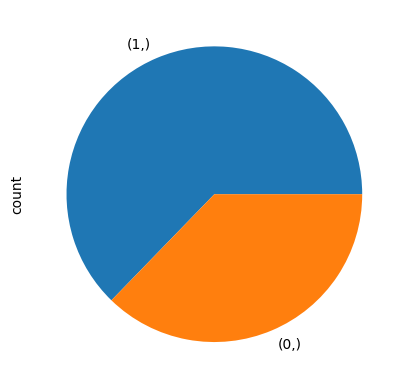

In [105]:
import seaborn as sns

target_dataframe = pd.DataFrame(b_cancer["target"], columns=['target'])

target_dataframe.value_counts().plot(kind="pie")

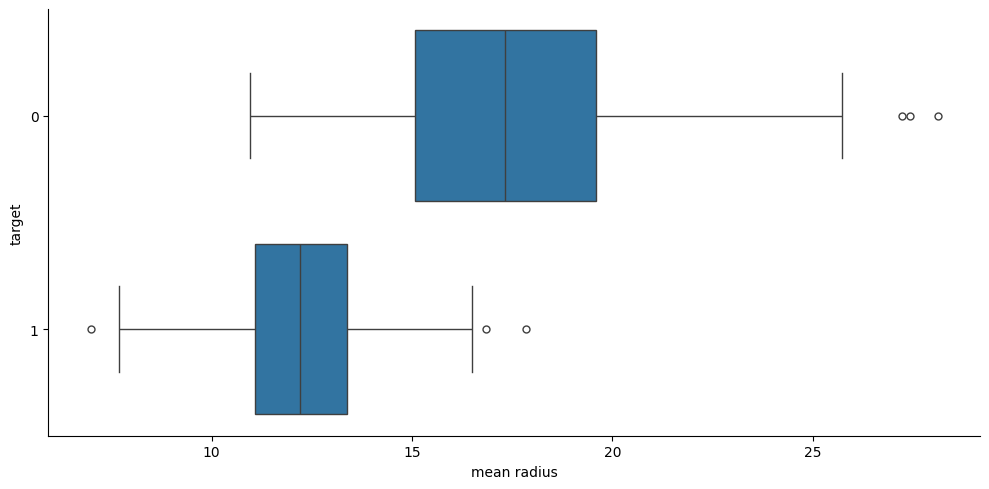

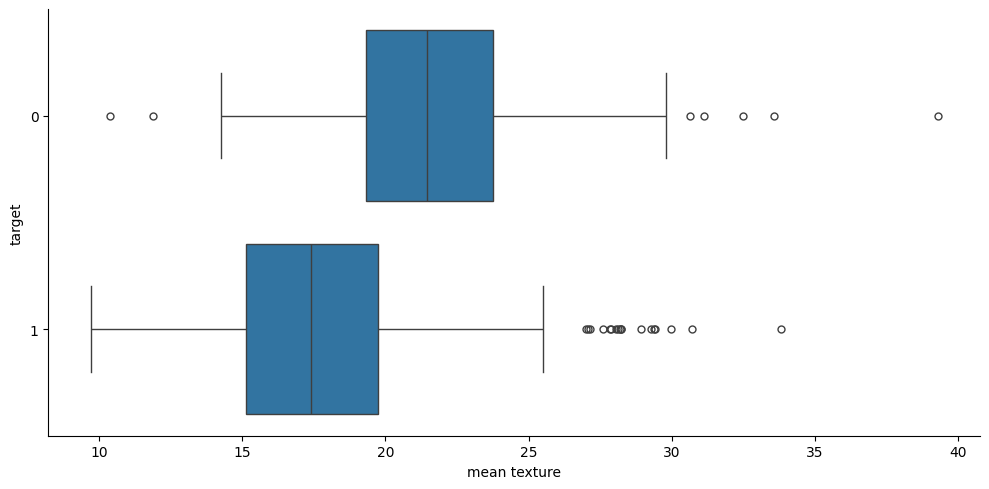

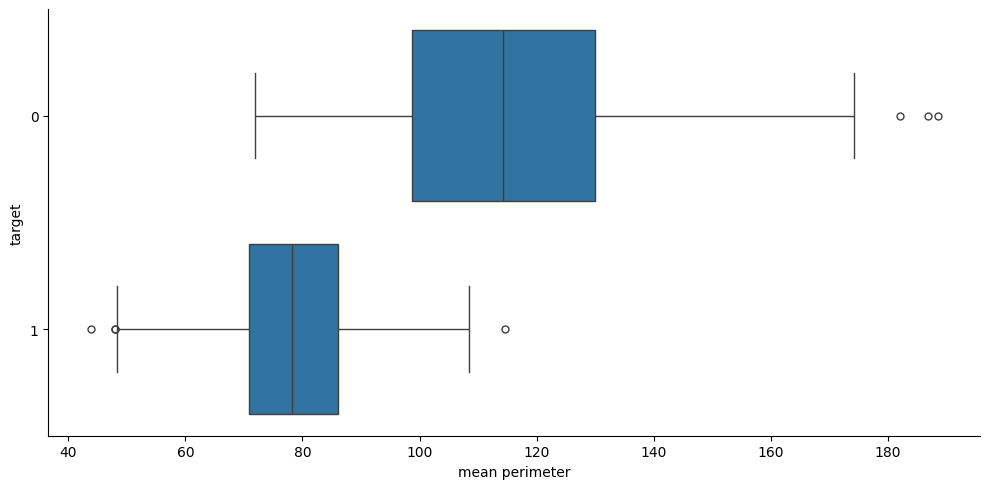

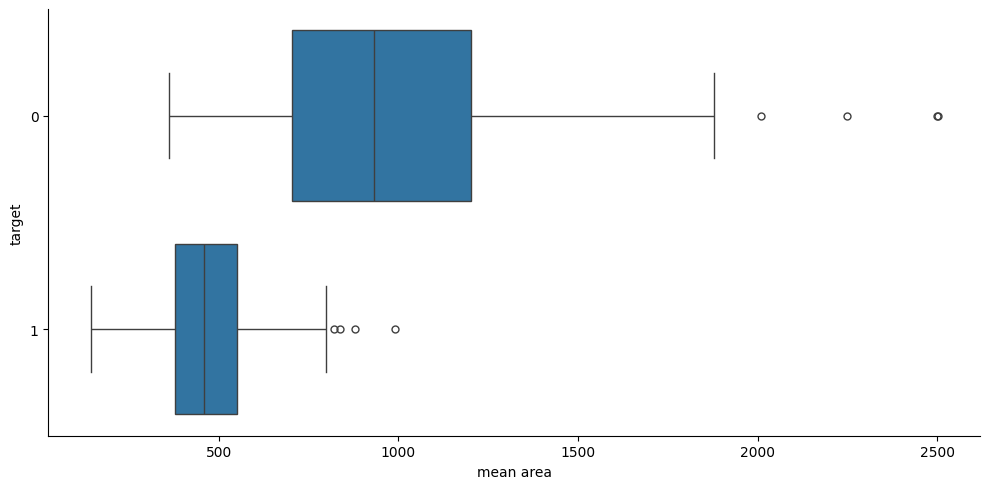

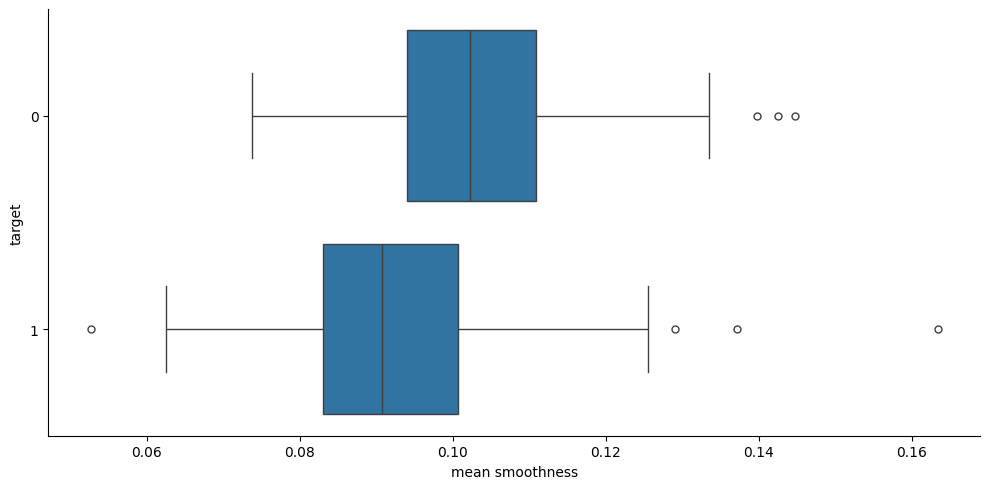

In [126]:
b_cancer_dataframe = pd.DataFrame(b_cancer['data'][:, :5], columns=b_cancer.feature_names[:5])

# Concatenate the DataFrames horizontally
result_df = pd.concat([b_cancer_dataframe, target_dataframe ], axis=1)
# Transform the "target" column to string
result_df['target'] = result_df['target'].astype(str)

sns.catplot(data = result_df, x = "mean radius", y = "target",aspect =2,\
             kind ="box")
sns.catplot(data = result_df, x = "mean texture", y = "target",aspect =2,\
             kind ="box")
sns.catplot(data = result_df, x = "mean perimeter", y = "target",aspect =2,\
             kind ="box")
sns.catplot(data = result_df, x = "mean area", y = "target",aspect =2,\
             kind ="box")
sns.catplot(data = result_df, x = "mean smoothness", y = "target",aspect =2,\
             kind ="box")


In [24]:
b_cancer.feature_names[:5]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness'], dtype='<U23')

array([[<Axes: xlabel='mean radius', ylabel='mean radius'>,
        <Axes: xlabel='mean texture', ylabel='mean radius'>,
        <Axes: xlabel='mean perimeter', ylabel='mean radius'>,
        <Axes: xlabel='mean area', ylabel='mean radius'>,
        <Axes: xlabel='mean smoothness', ylabel='mean radius'>],
       [<Axes: xlabel='mean radius', ylabel='mean texture'>,
        <Axes: xlabel='mean texture', ylabel='mean texture'>,
        <Axes: xlabel='mean perimeter', ylabel='mean texture'>,
        <Axes: xlabel='mean area', ylabel='mean texture'>,
        <Axes: xlabel='mean smoothness', ylabel='mean texture'>],
       [<Axes: xlabel='mean radius', ylabel='mean perimeter'>,
        <Axes: xlabel='mean texture', ylabel='mean perimeter'>,
        <Axes: xlabel='mean perimeter', ylabel='mean perimeter'>,
        <Axes: xlabel='mean area', ylabel='mean perimeter'>,
        <Axes: xlabel='mean smoothness', ylabel='mean perimeter'>],
       [<Axes: xlabel='mean radius', ylabel='mean area'>,
 

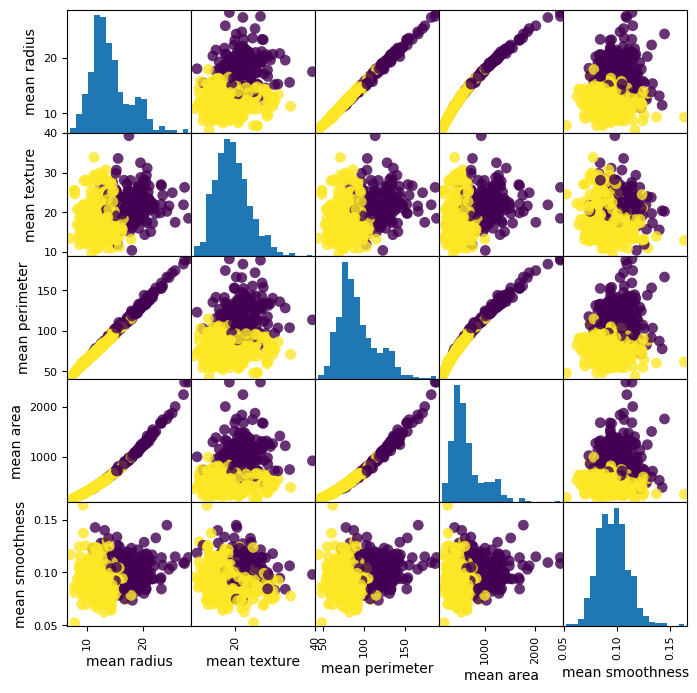

In [107]:
plt.rcParams['image.cmap'] = "viridis"

# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(b_cancer_dataframe, c=b_cancer["target"], figsize=(8, 8),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)

## 5. Split the data into training set (80%) and test set (20%) using random_state = 0.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    b_cancer['data'], b_cancer['target'], random_state=0, test_size=0.2)

In [27]:
print(round(len(b_cancer['data'])*0.8))

455


In [28]:
X_train.shape

(455, 30)

In [29]:
print(round(len(b_cancer['data'])*0.2))

114


In [30]:
X_test.shape

(114, 30)

## 6. Build KNN models with n_neighbors = {1, 2, 3, 4, 5}. Compare their performance on the training set and test set. Which one is the best model?

In [127]:
from sklearn.neighbors import KNeighborsClassifier
for n_neighbors in range(1,6):
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X_train, y_train)
    print("n_neighbors is eqaul to : {}".format(n_neighbors))
    print("Training set score: {:.4f}".format(knn.score(X_train, y_train)))
    print("Test set score: {:.4f}".format(knn.score(X_test, y_test)))
    print("\n")


KNeighborsClassifier(n_neighbors=1)

n_neighbors is eqaul to : 1
Training set score: 1.0000
Test set score: 0.9123




KNeighborsClassifier(n_neighbors=2)

n_neighbors is eqaul to : 2
Training set score: 0.9626
Test set score: 0.8947




KNeighborsClassifier(n_neighbors=3)

n_neighbors is eqaul to : 3
Training set score: 0.9604
Test set score: 0.9123




KNeighborsClassifier(n_neighbors=4)

n_neighbors is eqaul to : 4
Training set score: 0.9516
Test set score: 0.9211




KNeighborsClassifier()

n_neighbors is eqaul to : 5
Training set score: 0.9495
Test set score: 0.9386




When k is being larger, the Training score drops from 1.000 to 0.9495
But the test score raises from 0.9123 to 0.9386
We may conclude that when k is become larger the model is being less overfitting; since k is larger it is less complicated so it less easy to over-fitting 

We will choose the model when k = 5 as the best model since it has the lowest Test score: 0.9386.